## How are in-demand skills trending for Data Scientists in UK?

Methodology

1. Aggregate skill counts monthly
2. Re-analyse based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data scientists jobs in the UK

df_DA_UK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

In [3]:
# Aggregating it on monthly basis

df_DA_UK['job_posted_month_no'] = df_DA_UK['job_posted_date'].dt.month

In [4]:
# Exploding the datafram on job_skills

df_DA_UK_explode = df_DA_UK.explode('job_skills')

In [6]:
# Pivoting the exploded data
df_DA_UK_pivot = df_DA_UK_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [27]:
# Sorting the job_skill columns using loc
df_DA_UK_pivot.loc['Total'] = df_DA_UK_pivot.sum()

# Sorting the dataframe
df_DA_UK_pivot = df_DA_UK_pivot[df_DA_UK_pivot.loc['Total'].sort_values(ascending=False).index]

# Dropping the Total row
df_DA_UK_pivot = df_DA_UK_pivot.drop('Total')

# Converting df_DA_UK_pivot from count to percentage relative to all job postings
DS_total = df_DA_UK.groupby('job_posted_month_no').size()
df_DA_UK_percent = df_DA_UK_pivot.div(DS_total/100, axis=0)

# Changes month number to month name
df_DA_UK_percent = df_DA_UK_percent.reset_index()
df_DA_UK_percent['job_posted_month'] = df_DA_UK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_UK_percent = df_DA_UK_percent.set_index('job_posted_month')
df_DA_UK_percent = df_DA_UK_percent.drop(columns='job_posted_month_no')

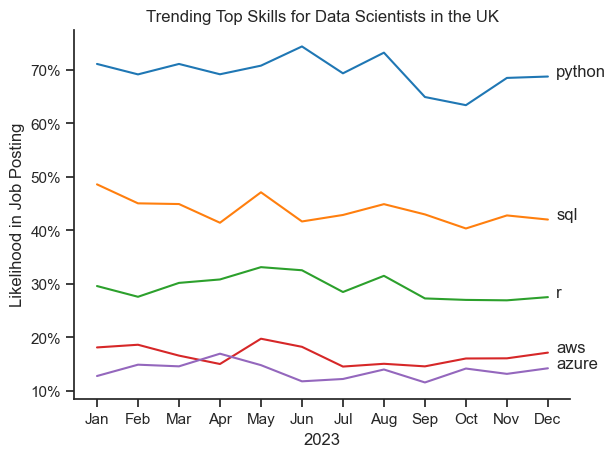

In [32]:
# Plotting the skills trends using Seaborn
df_plot = df_DA_UK_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Scientists in the UK')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
plt.show()